# Assignment 2

 ## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.b
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


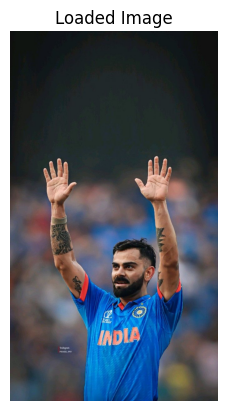

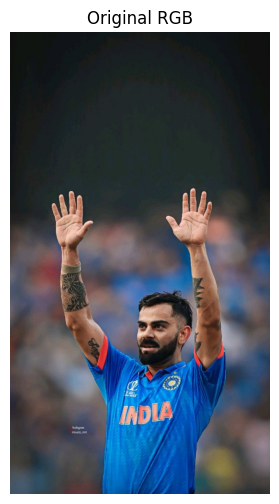

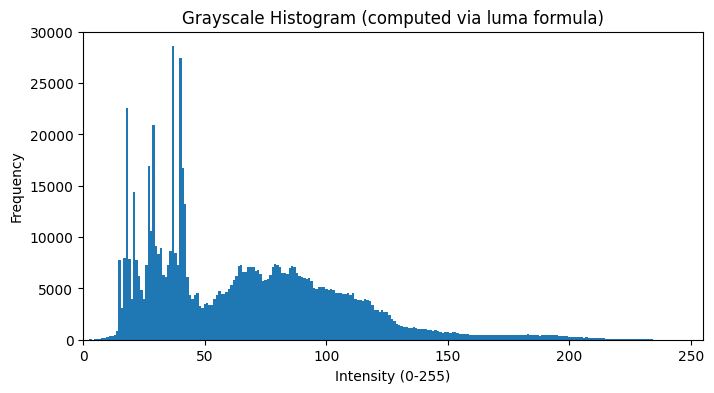

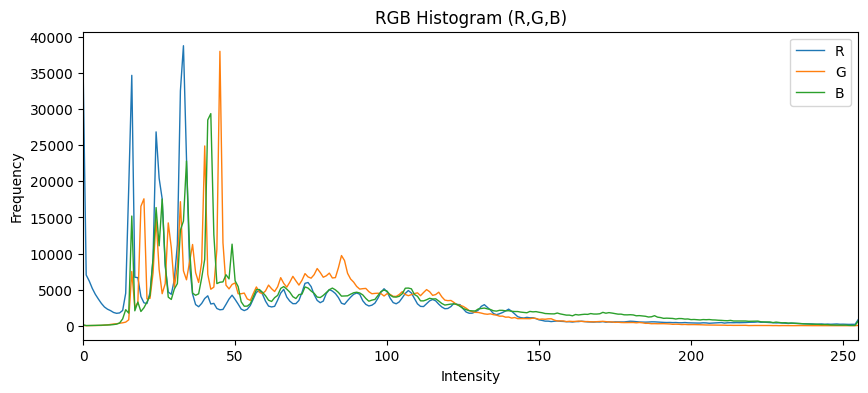

In [3]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def load_image_from_file(path="Virat.jpg"):
    img = Image.open(path).convert("RGB")
    return np.array(img, dtype=np.uint8)

# Load
img_rgb = load_image_from_file("Virat.jpg")

plt.imshow(img_rgb)
plt.axis("off")
plt.title("Loaded Image")
plt.show()

# Notebook cell 1: Part A - grayscale histogram function using pure numpy loops
def gray_histogram(gray_img):
    """
    Input: gray_img -> 2D numpy array dtype uint8, values 0..255 (non-normalized)
    Returns: hist -> 1D numpy array length 256 with counts
    Implemented using pure Python/Numpy loops (no np.histogram or cv2).
    """
    h, w = gray_img.shape
    hist = np.zeros(256, dtype=np.int64)
    # pure loops: iterate pixels and increment counts
    for i in range(h):
        row = gray_img[i]
        for j in range(w):
            val = int(row[j])  # 0..255
            hist[val] += 1
    return hist

def plot_gray_histogram(gray_img, title='Grayscale Histogram'):
    hist = gray_histogram(gray_img)
    plt.figure(figsize=(8,4))
    plt.bar(np.arange(256), hist, width=1.0)
    plt.xlim(0,255)
    plt.xlabel('Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# RGB histogram (three channels), implemented with numpy but using channel-wise loops
def rgb_histogram(img_rgb):
    """
    Input: img_rgb -> HxWx3 uint8 RGB
    Returns: hist_r, hist_g, hist_b each length-256 arrays
    Uses simple loops per channel (no cv2 or np.histogram).
    """
    h, w, _ = img_rgb.shape
    hist_r = np.zeros(256, dtype=np.int64)
    hist_g = np.zeros(256, dtype=np.int64)
    hist_b = np.zeros(256, dtype=np.int64)
    for i in range(h):
        row = img_rgb[i]
        for j in range(w):
            r,g,b = row[j]
            hist_r[int(r)] += 1
            hist_g[int(g)] += 1
            hist_b[int(b)] += 1
    return hist_r, hist_g, hist_b

def plot_rgb_histogram(img_rgb, title='RGB Histogram'):
    hr, hg, hb = rgb_histogram(img_rgb)
    x = np.arange(256)
    plt.figure(figsize=(10,4))
    plt.plot(x, hr, label='R', linewidth=1)
    plt.plot(x, hg, label='G', linewidth=1)
    plt.plot(x, hb, label='B', linewidth=1)
    plt.xlim(0,255)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

# load image (edit the line to choose file or base64)
img_rgb = load_image_from_file('Virat.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original RGB')

# grayscale version
gray = np.dot(img_rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
plot_gray_histogram(gray, 'Grayscale Histogram (computed via luma formula)')
plot_rgb_histogram(img_rgb, 'RGB Histogram (R,G,B)')


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

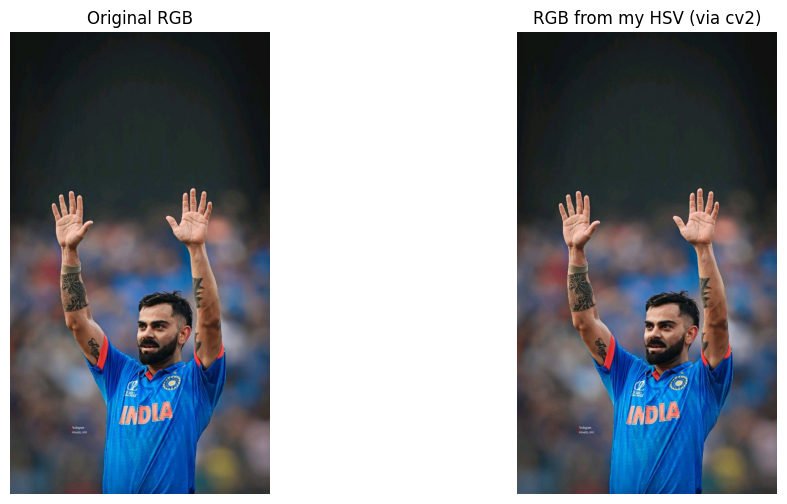

Max difference per channel after round-trip (R,G,B): [3 8 6]


In [4]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

# Notebook cell 2: PART B - RGB -> HSV (NumPy) and verification
# Input: img_rgb (HxWx3 uint8 RGB) already loaded in your notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rgb_to_hsv_opencv_style(img_rgb_uint8):
    """
    Convert RGB (uint8 0..255) to HSV in OpenCV style:
      H: 0..179  (uint8)
      S: 0..255  (uint8)
      V: 0..255  (uint8)
    Pure NumPy implementation (no cv2 for conversion).
    """
    # convert to float in [0,1]
    img = img_rgb_uint8.astype(np.float32) / 255.0
    R = img[..., 0]
    G = img[..., 1]
    B = img[..., 2]

    maxc = np.maximum(np.maximum(R, G), B)
    minc = np.minimum(np.minimum(R, G), B)
    diff = maxc - minc

    # Value channel (V) is max
    V = maxc

    # Saturation
    S = np.zeros_like(maxc)
    mask = maxc > 1e-8
    S[mask] = diff[mask] / maxc[mask]

    # Hue calculation in degrees [0,360)
    H = np.zeros_like(maxc)

    # avoid division by zero for diff==0 by only computing where diff>0
    nz = diff > 1e-8

    # R is max
    mask_r = (maxc == R) & nz
    H[mask_r] = ( (G[mask_r] - B[mask_r]) / diff[mask_r] ) % 6
    # G is max
    mask_g = (maxc == G) & nz
    H[mask_g] = ( (B[mask_g] - R[mask_g]) / diff[mask_g] ) + 2
    # B is max
    mask_b = (maxc == B) & nz
    H[mask_b] = ( (R[mask_b] - G[mask_b]) / diff[mask_b] ) + 4

    H = H * 60.0  # convert to degrees
    H[H < 0] += 360.0

    # Convert to OpenCV scale: H 0..179, S 0..255, V 0..255
    H_cv = (H / 2.0)  # 0..180
    S_cv = S * 255.0
    V_cv = V * 255.0

    hsv = np.stack([H_cv, S_cv, V_cv], axis=-1)
    hsv = np.clip(hsv, 0, 255 - 1e-6).astype(np.uint8)
    # ensure H in 0..179
    hsv[..., 0] = np.minimum(hsv[..., 0], 179)
    return hsv

def hsv_to_rgb_from_opencv_style(hsv_uint8):
    """
    Convert HSV (OpenCV style uint8) back to RGB (uint8) using cv2 for verification.
    cv2 expects HSV in H:0..179,S:0..255,V:0..255 and returns BGR.
    We'll convert BGR->RGB before returning.
    """
    bgr = cv2.cvtColor(hsv_uint8, cv2.COLOR_HSV2BGR)
    rgb = bgr[..., ::-1]
    return rgb

# Run conversion and verify visually (should look identical)
hsv_my = rgb_to_hsv_opencv_style(img_rgb)
rgb_back = hsv_to_rgb_from_opencv_style(hsv_my)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.axis('off'); plt.title('Original RGB')
plt.subplot(1,2,2); plt.imshow(rgb_back); plt.axis('off'); plt.title('RGB from my HSV (via cv2)')
plt.show()

# Print max per-channel difference (should be small / zero)
diff = np.abs(img_rgb.astype(int) - rgb_back.astype(int))
print("Max difference per channel after round-trip (R,G,B):", diff.max(axis=(0,1)))


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

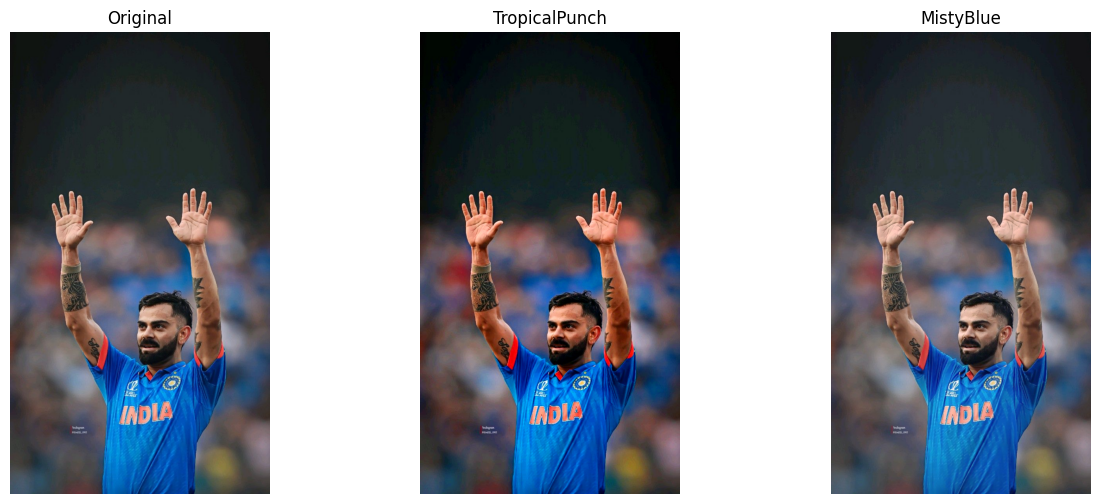

TropicalPunch: contrast + saturation + slight warm tint -> good for portraits, sunsets, beach photos.
MistyBlue: gamma soften + split-toning (blue shadows, warm highlights) -> good for moody landscapes/night scenes.


In [5]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

# Notebook cell 3: PART C - Two custom filters (NumPy). Functions accept and return RGB uint8.

# Helper clamp
def clamp_uint8(arr):
    return np.clip(arr, 0, 255).astype(np.uint8)

# Filter 1: "TropicalPunch"
def tropical_punch(img_rgb, sat_boost=1.25, contrast_gain=1.12, warm_R_gain=1.06):
    """
    TropicalPunch:
      - Contrast (linear around 128)
      - Saturation boost (manipulate S in HSV)
      - Warm red tint (multiply R channel slightly)
    """
    img = img_rgb.astype(np.float32)

    # 1) Contrast: simple linear contrast w.r.t midpoint 128
    img = (img - 128.0) * contrast_gain + 128.0

    # 2) Convert to HSV, boost S
    hsv = rgb_to_hsv_opencv_style(clamp_uint8(img))
    hsv = hsv.astype(np.float32)
    hsv[..., 1] = hsv[..., 1] * sat_boost  # increase saturation
    hsv[..., 1] = np.clip(hsv[..., 1], 0, 255)
    hsv = hsv.astype(np.uint8)

    # convert back to RGB (cv2)
    rgb = hsv_to_rgb_from_opencv_style(hsv).astype(np.float32)

    # 3) Warm tint: multiply R channel a bit
    # note: rgb arrays are RGB order
    rgb[..., 0] = rgb[..., 0] * warm_R_gain

    return clamp_uint8(rgb)

# Filter 2: "MistyBlue"
def misty_blue(img_rgb, gamma=1.08, shadow_blue_strength=0.18, highlight_warm_strength=0.10):
    """
    MistyBlue:
      - Gamma correction to soften
      - Split-toning: boost blue in shadows, boost red in highlights
      - Slight midtone desaturation
    """
    img = img_rgb.astype(np.float32) / 255.0  # normalize to 0..1

    # 1) Gamma correction (adjust exposure/soften)
    img = np.power(img, 1.0 / gamma)

    # 2) Luminance and masks
    lum = 0.299*img[...,0] + 0.587*img[...,1] + 0.114*img[...,2]
    shadow_mask = np.clip((0.35 - lum) / 0.35, 0, 1)[..., np.newaxis]  # 1 in deep shadows
    highlight_mask = np.clip((lum - 0.65) / 0.35, 0, 1)[..., np.newaxis]  # 1 in strong highlights
    mid_mask = 1.0 - np.clip(shadow_mask + highlight_mask, 0, 1)

    # 3) Boost blue in shadows
    img[..., 2] = img[..., 2] * (1.0 + shadow_blue_strength * shadow_mask[...,0])

    # 4) Boost red in highlights
    img[..., 0] = img[..., 0] * (1.0 + highlight_warm_strength * highlight_mask[...,0])

    # 5) Slight midtone desaturation: lerp towards grayscale in mids
    gray = (img[...,0] + img[...,1] + img[...,2]) / 3.0
    desat_amount = 0.12  # how much to desaturate in mids
    img[...,0] = img[...,0] * (1 - desat_amount*mid_mask[...,0]) + gray * (desat_amount*mid_mask[...,0])
    img[...,1] = img[...,1] * (1 - desat_amount*mid_mask[...,0]) + gray * (desat_amount*mid_mask[...,0])
    img[...,2] = img[...,2] * (1 - desat_amount*mid_mask[...,0]) + gray * (desat_amount*mid_mask[...,0])

    img = np.clip(img * 255.0, 0, 255)
    return clamp_uint8(img)

# Apply and show filters side-by-side
trop = tropical_punch(img_rgb)
mist = misty_blue(img_rgb)

plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(trop); plt.title('TropicalPunch'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(mist); plt.title('MistyBlue'); plt.axis('off')
plt.show()

# Short notes:
print("TropicalPunch: contrast + saturation + slight warm tint -> good for portraits, sunsets, beach photos.")
print("MistyBlue: gamma soften + split-toning (blue shadows, warm highlights) -> good for moody landscapes/night scenes.")


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

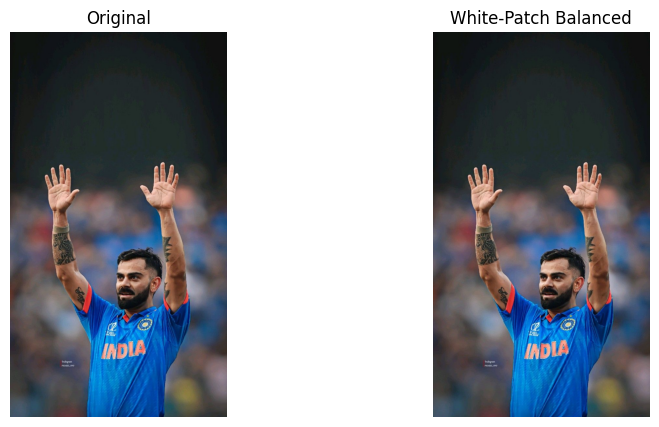

Max (R,G,B) before: 255.0 255.0 255.0


In [6]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
# Notebook cell 4: PART D - White Patch Method (Max-RGB) - NumPy only

def white_patch_balance(img_rgb):
    """
    White-Patch (Max-RGB) white balance.
    Find the maximum value per channel, compute scale factors to map to 255,
    and scale each channel independently.
    Input: uint8 RGB
    Output: uint8 RGB
    """
    arr = img_rgb.astype(np.float32)
    max_r = arr[...,0].max()
    max_g = arr[...,1].max()
    max_b = arr[...,2].max()
    eps = 1e-8
    scale_r = 255.0 / (max_r + eps)
    scale_g = 255.0 / (max_g + eps)
    scale_b = 255.0 / (max_b + eps)

    out = np.empty_like(arr)
    out[...,0] = arr[...,0] * scale_r
    out[...,1] = arr[...,1] * scale_g
    out[...,2] = arr[...,2] * scale_b

    return clamp_uint8(out)

# Run and display
wb = white_patch_balance(img_rgb)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(wb); plt.title('White-Patch Balanced'); plt.axis('off')
plt.show()

# Print scale factors (for debugging/inspection)
arrf = img_rgb.astype(np.float32)
print("Max (R,G,B) before:", arrf[...,0].max(), arrf[...,1].max(), arrf[...,2].max())


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

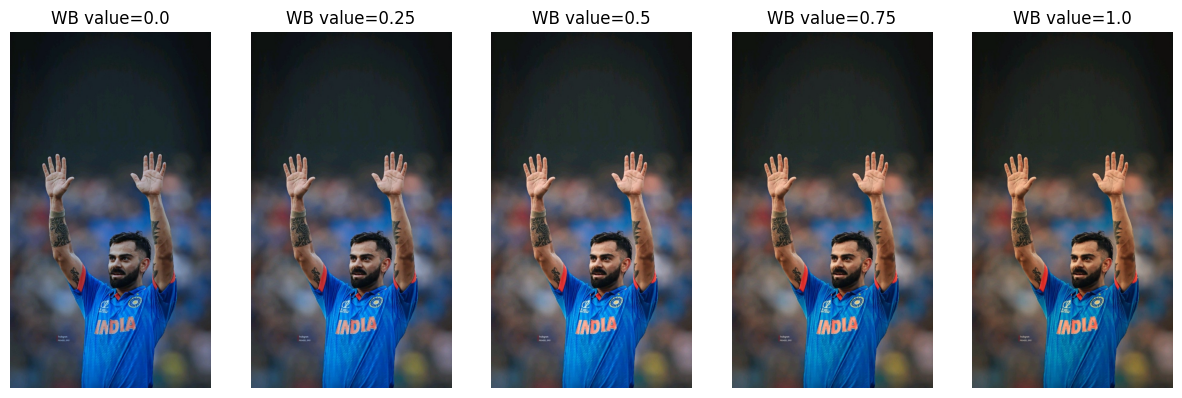

In [7]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

# Notebook cell 5: PART E - White Balance Slider function (value in [0,1]) and demo

def white_balance_slider(img_rgb, value):
    """
    value in [0,1]:
      0   -> coldest (blueish)
      0.5 -> original
      1   -> warmest (orangish)
    Approach:
      - define cold multipliers and warm multipliers for channels
      - interpolate multipliers so 0.5 -> identity (1,1,1)
      - apply multipliers channel-wise, preserve exposure by scaling if clipping occurs
    """
    assert 0.0 <= value <= 1.0, "value must be in [0,1]"
    img = img_rgb.astype(np.float32)

    # cold and warm multipliers (R,G,B)
    cold = np.array([0.86, 1.00, 1.12], dtype=np.float32)   # colder -> less R, more B
    warm = np.array([1.12, 1.05, 0.92], dtype=np.float32)   # warmer -> more R, less B
    identity = np.array([1.0, 1.0, 1.0], dtype=np.float32)

    if value <= 0.5:
        t = value / 0.5
        mult = cold * (1 - t) + identity * t
    else:
        t = (value - 0.5) / 0.5
        mult = identity * (1 - t) + warm * t

    out = img.copy()
    out[...,0] = out[...,0] * mult[0]  # R
    out[...,1] = out[...,1] * mult[1]  # G
    out[...,2] = out[...,2] * mult[2]  # B

    # Tone-preserving clamp: if clipping occurs, scale down uniformly
    max_val = out.max()
    if max_val > 255:
        out = out * (255.0 / max_val)

    return clamp_uint8(out)

# Demo several slider positions side-by-side
vals = [0.0, 0.25, 0.5, 0.75, 1.0]
outs = [white_balance_slider(img_rgb, v) for v in vals]

plt.figure(figsize=(15,6))
for i, v in enumerate(vals):
    plt.subplot(1, len(vals), i+1)
    plt.imshow(outs[i])
    plt.title(f'WB value={v}')
    plt.axis('off')
plt.show()
